# PLAN - PHASE 2

0. [x] Get the data.
0. [x] Prepare the data for exploration.
0. [ ] Split the data into train and test sets.
0. [ ] Explore the data.
0. [ ] Do cross-validation with the data.
0. [ ] Code and evaluate several models.
0. [ ] Evaluate out of sample data (test set).

# ENVIRONMENT

In [1]:
# basic ewnvironment and custom scripts
import os
import acquire
import prepare
import explore

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import operator

# matplotlib and seaborn for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing for scaling and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# conda install -c glemaitre imbalanced-learn
from imblearn.ensemble import BalancedBaggingClassifier

# to explode the DataFrames and avoid truncation
pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# ACQUISITION

In [2]:
# utilize acquire script to get primary dataframe for analysis
dfa, dfb = acquire.get_data()

## _'dfa' : this is the dataframe with the NAW (Not Abused Woman) & AW (Abused Woman) cases._

In [3]:
dfa.shape

(705, 44)

## _'dfb' : this is the dataframe with the AW (Abused Woman) cases_

In [4]:
dfb.shape

(497, 29)

In [5]:
# placeholder cell: perhaps going to utilize these in a later phase

# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')

# PREPARATION

## _Examining the dataframes, dfa & dfb, for any missing or inconsistent values._

In [6]:
dfa.head(8).T

,0,1,2,3,4,5,6,7
CASEID,108395,108397,108399,108443,108444,108456,108460,108525
ABUSED,1,1,1,1,1,1,1,1
SCRSTATR,1,1,1,1,1,1,1,1
LENGTHC1,1,2,5,2,2,2,3,4
C1SITUAT,1,1,1,1,1,3,1,4
PABUSE,1,1,1,1,1,1,1,3
D3RCHILT,1,0,6,0,1,1,1,2
E13PRGNT,3,3,3,1,2,3,888,3
N7PREGNT,2,3,2,2,2,2,1,2
TOTSUPRT,9,11,9,12,11,2,10,11


In [7]:
dfb.head(8).T

,0,1,2,3,4,5,6,7
CASEID,108395,108397,108399,108443,108444,108456,108460,108525
M5FIRED,9999,9999,9999,9999,9999,9999,9999,1
M11HIGH,2,2,2,2,1,1,2,2
M35SAFE,1,1,1,1,1,1,1,1
M41ILLGL,2,2,2,2,2,2,2,1
M42DAGRR,0,0,0,0,0,1,0,1
M13TALKR,1,1,1,1,1,1,1,1
M32OTHER,99,99,99,13,99,11,11,41
M27HOW,99999,99999,99999,99999,99999,11,99999,21
M30ARRES,3,3,3,3,3,0,3,1


In [8]:
prepare.get_nulls_by_column(dfa)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [9]:
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [10]:
prepare.get_nulls_by_row(dfa)

In [11]:
prepare.get_nulls_by_row(dfb)

In [12]:
prepare.summarize_data(dfa)

HEAD
   CASEID  ABUSED  SCRSTATR  LENGTHC1  C1SITUAT  PABUSE  D3RCHILT  E13PRGNT  \
0  108395       1         1         1         1       1         1         3   
1  108397       1         1         2         1       1         0         3   
2  108399       1         1         5         1       1         6         3   
3  108443       1         1         2         1       1         0         1   
4  108444       1         1         2         1       1         1         2   

   N7PREGNT  TOTSUPRT    ...     N16CHILD  N17ARRST  N1FRQNCY  N2SVRITY  \
0         2         9    ...            2         2         2         2   
1         3        11    ...            2         1         2         1   
2         2         9    ...            2         2         2         2   
3         2        12    ...            2         1         2         2   
4         2        11    ...            2         1         1         1   

   N3WEAPON  N4CHOKE  N5SEX  N6CONTRL  N8JEALUS  N10CPBLE  
0        

In [13]:
prepare.summarize_data(dfb)

HEAD
   CASEID  M5FIRED  M11HIGH  M35SAFE  M41ILLGL  M42DAGRR  M13TALKR  M32OTHER  \
0  108395     9999        2        1         2         0         1        99   
1  108397     9999        2        1         2         0         1        99   
2  108399     9999        2        1         2         0         1        99   
3  108443     9999        2        1         2         0         1        13   
4  108444     9999        1        1         2         0         1        99   

   M27HOW  M30ARRES    ...     FORCEDR  MISCARR  RESTRAIN  CHOKED  NDRUNK  \
0   99999         3    ...           0        0         0       0       0   
1   99999         3    ...           0        0         0       1       2   
2   99999         3    ...           0        0         1       1       0   
3   99999         3    ...           0        0         0       1       1   
4   99999         3    ...           0        0         0       0       3   

   RDRUNK  BOTHDRUN  NDRUGS  RDRUGS  BOTHDRUG  
0  

## _We will utilize the first dataframe's Case IDs to group our incident data from set 10 to group by incident and identify surveyed individuals that were victim to more than one instance of abuse_

In [14]:
dfa['RECID'] = dfa.CASEID.apply(prepare.get_repeat_case)

## _This new column, RECID, is a boolean value that tells us whether the cases were re-assault cases or not._

In [15]:
# look at unaltered value counts
prepare.value_counts(dfa)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [16]:
# change dfa to df to match conventions of prepare.py
df = dfa
#use prepare function to rename features 
prepare.rename_columns_all(df)
dfa = df

In [17]:
dfa.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,0
1,108397,1,1,2,1,1,0,3,3,11,...,1,2,1,1,1,1,2,1,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,1,2,2,2,2,1
3,108443,1,1,2,1,1,0,1,2,12,...,1,2,2,1,1,2,1,2,2,0
4,108444,1,1,2,1,1,1,2,2,11,...,1,1,1,2,2,2,2,2,2,1


In [18]:
#use prepare function to rename features 
prepare.rename_columns_recid(dfb)

In [19]:
dfb.head()

,id,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,...,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0


In [20]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals_all(dfa)

In [21]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals_recid(dfb)

In [22]:
dfa = dfa[dfa.abuse_past_year == 1]

In [23]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'thrown_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault'],
      dtype='object')

In [24]:
dfa = dfa.drop(columns=['guns_in_home',
                        'threat_hit',
                        'beaten',
                        'choked',
                        'threat_knife',
                        'threat_gun',
                        'rape_with_threat',
                        'partner_drug_use',
                        'partner_alcohol_use',
                        'weapon_ever',
                        'choked_ever',
                        'jealous_past_year'
                       ])

In [25]:
dfa.shape

(497, 33)

In [26]:
dfb.columns

Index(['id', 'gun_fired', 'anyone_high', 'safe_place', 'forced_illegal',
       'life_danger', 'talk_about_it', 'left_or_not', 'medical_staff_helpful',
       'perp_arrested_ever', 'police_resp', 'order_protection',
       'level_severity', 'num_incidents', 'num_threats', 'num_slapping',
       'num_punching', 'num_beating', 'num_weapon', 'num_forced_sex',
       'miscarriage_resulted', 'restrained_by_perp', 'num_choked',
       'num_perp_drunk', 'num_woman_drunk', 'num_both_drunk', 'num_perp_drugs',
       'num_woman_drugs', 'num_both_drugs'],
      dtype='object')

In [27]:
dfb = dfb.drop(columns=['police_resp',
                        'order_protection',
                        'num_woman_drunk',
                        'num_perp_drunk',
                        'num_woman_drugs',
                        'num_perp_drugs',
                       ])

In [28]:
dfb.shape

(497, 23)

In [29]:
dfa.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

## _Merge dfa and dfb on ID._

In [30]:
dfb = dfa.merge(right=dfb, on='id')

In [31]:
dfb.shape

(497, 55)

In [32]:
dfb.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs
0,108395,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,1,0,0,0,0,0,0,1,0,0
2,108399,1,1,5,1,1,2,0,0,0,...,1,0,1,0,0,0,1,1,0,0
3,108443,1,1,2,1,1,0,1,0,12,...,0,0,1,0,0,0,0,1,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,3,0,0,0,0,0,0,0,0,0


In [33]:
dfb.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'limit_family_contact',
       'location_tracking', 'thrown_object', 'push_shove', 'slap',
       'kick_punch', 'hit_object', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'threat_suicide', 'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'rape_ever',
       'controlled_ever', 'jealous', 'capable_murder', 'reassault',
       'gun_fired', 'anyone_high', 'safe_place', 'forced_illegal',
       'life_danger', 'talk_about_it', 'left_or_not', 'medical_staff_helpful',
       'perp_arrested_ever', 'level_severity', 'num_incidents', 'num_threats',
       'num_slapping', 'num_punching', 'num_beating', 'num_weapon',
       'num_forced_sex', 'miscarriage_resulted', 'restrained_by_perp'

In [34]:
dfb.head(5).T

,0,1,2,3,4
id,108395,108397,108399,108443,108444
abuse_past_year,1,1,1,1,1
abuse_status,1,1,1,1,1
length_relationship,1,2,5,2,2
partner_abusive,1,1,1,1,1
num_abusers,1,1,1,1,1
num_children,1,0,2,0,1
pregnant,0,0,0,1,0
beaten_while_pregnant,0,0,0,0,0
support_score,0,11,0,12,11


In [35]:
dfb.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

In [36]:
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


## Train / Test Split

In [37]:
# b_columns = ['',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#              '',
#             ]
# X = dfb[b_columns]

X = dfb.drop(columns=['reassault'])
y = dfb[['reassault']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 0, stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [38]:
train_df.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
113,308002,1,1,2,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
320,508089,1,0,5,1,1,0,0,1,0,...,4,3,0,0,0,0,99,0,0,1
163,308153,1,1,1,1,1,0,0,0,12,...,1,2,0,1,0,0,1,0,0,1
51,148350,1,1,4,1,1,0,0,0,11,...,1,0,0,0,0,0,0,0,0,0
388,508650,1,1,5,1,1,0,0,0,6,...,0,0,1,0,0,0,0,0,1,0


In [39]:
test_df.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
397,618256,1,1,4,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
247,308492,1,1,4,1,1,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
262,318488,1,0,2,1,1,1,0,0,12,...,0,0,0,0,0,0,0,0,0,0
453,708501,1,1,6,1,1,2,0,1,0,...,0,1,0,2,0,0,0,0,0,1
487,808552,1,0,3,1,1,2,0,0,12,...,2,4,0,0,0,0,99,0,0,1


# EXPLORATION

In [40]:
def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

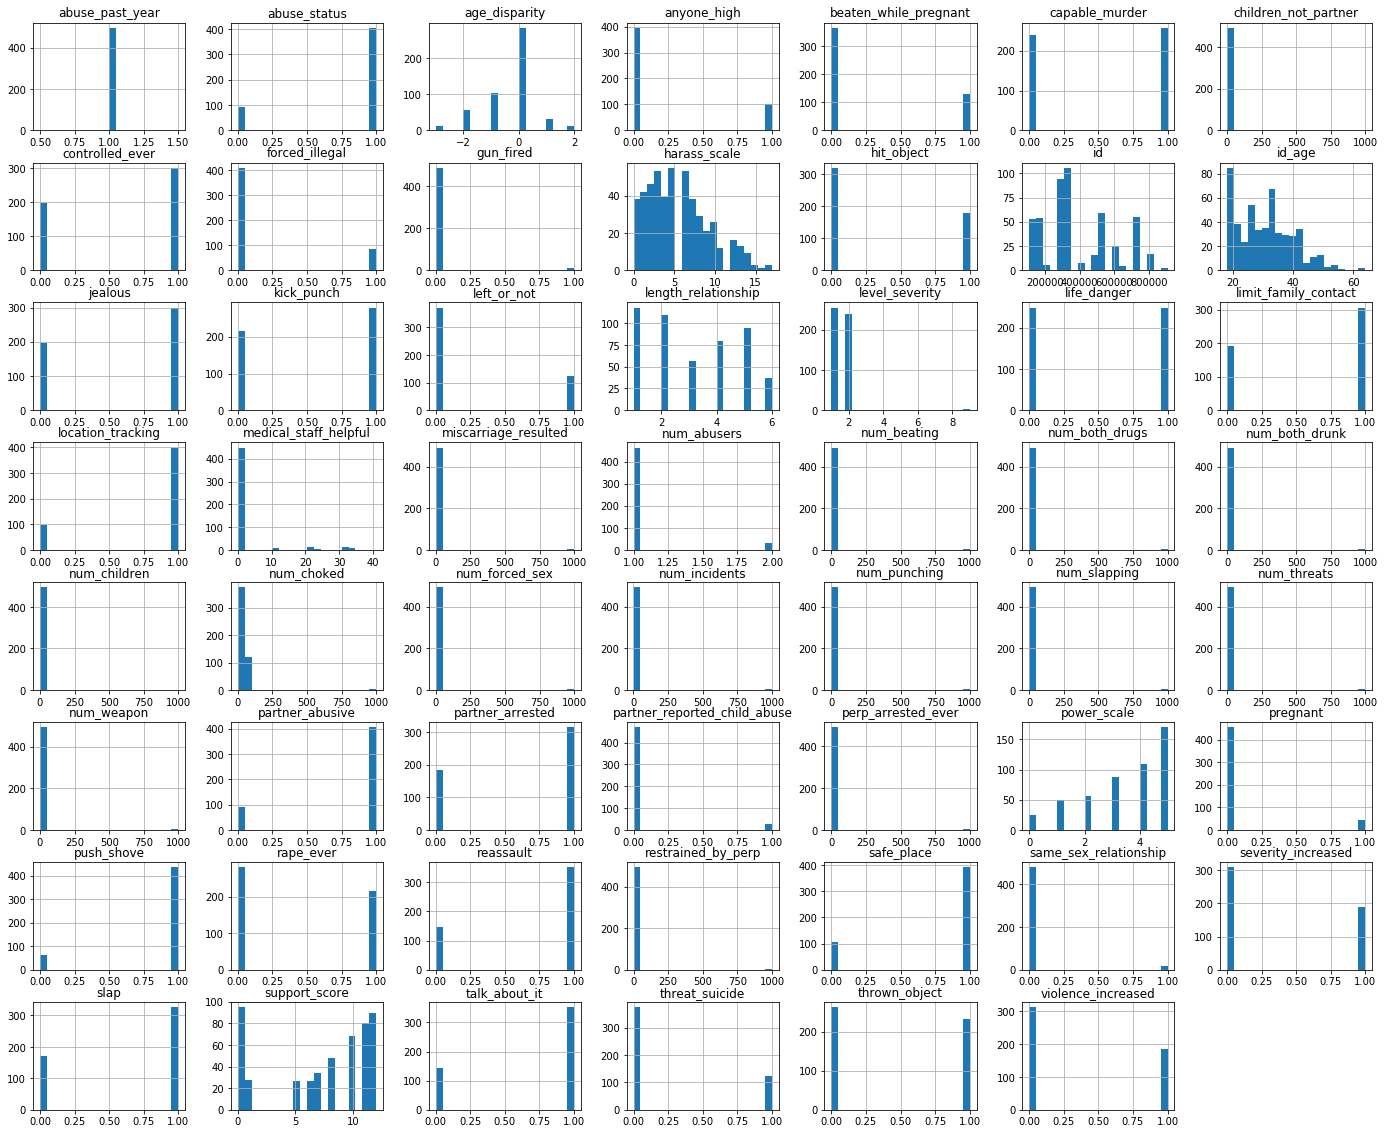

In [41]:
plot_hist(dfb)